# Random Forest
## Conceito
**Random Forest** é uma técnica de aprendizado de máquina baseada em bagging, que combina várias árvores de decisão para melhorar a precisão e reduzir a variabilidade (*overfitting*). A principal ideia por trás do Random Forest é criar um conjunto de árvores de decisão independentes e não correlacionadas, utilizando subconjuntos aleatórios tanto dos dados quanto dos atributos (*features*). Ao combinar as previsões de várias árvores, o modelo se beneficia da **Sabedoria da Multidão**, resultando em previsões mais robustas e generalizáveis do que uma única árvore de decisão.

## Construção
A técnica de Random Forest pode ser dividida em três passos principais: **bootstrap**, **feature randomization** (aleatorização de atributos) e **aggregating**.

### Bootstrap
A partir do conjunto de dados inicial *D*, são gerados vários subconjuntos de dados *d* por meio da amostragem com reposição (*bootstrap sampling*). Cada subconjunto *d* é então usado para treinar uma árvore de decisão independente.

### Feature Randomization
Além de treinar cada árvore em subconjuntos de dados, o Random Forest introduz uma aleatoriedade extra: em cada divisão de um nó da árvore, apenas um subconjunto aleatório dos atributos (*features*) é considerado para escolher a melhor divisão. Isso aumenta a diversificação entre as árvores e diminui a correlação entre elas, tornando o modelo mais robusto.

### Aggregating
As previsões de todas as árvores são combinadas: no caso de classificação, as previsões mais frequentes são usadas como a resposta final, e no caso de regressão, a média das previsões é usada. Esse processo de agregação diminui a variância do modelo e melhora a capacidade de generalização.

### RandomForestClassifier
O algoritmo **RandomForestClassifier** é uma implementação do Random Forest para tarefas de classificação. Ele ajusta diversas árvores de decisão em subconjuntos aleatórios dos dados e atributos, e depois combina suas previsões por meio de votação majoritária para fornecer uma previsão final mais precisa e confiável. A introdução da aleatoriedade nos dados e nos atributos ajuda a reduzir o overfitting e melhora a robustez do modelo em relação aos dados de treino.

## Implementação
Abaixo segue a implemenação do algoritmo de **Random Forest Classifier** da biblioteca **Scikit-learn**

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [6]:
data = pd.read_csv('../Mod_18/data/input/bank-additional-full.csv', sep=';')[['age', 'job', 'marital', 'education', 'default']]
print(data['default'].value_counts())
print(data.shape)

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64
(41188, 5)


## Observação
Para motivos de demonstração, iremos converter todos os valores 'unknown' para 'yes'

In [7]:
data.loc[data['default'] == 'unknown', 'default'] = 'yes'
data['default'] = data['default'].map({'yes': 1, 'no': 0})
data.shape

(41188, 5)

In [8]:
data = pd.concat([data.drop(['job', 'marital', 'education'], axis=1), pd.get_dummies(data[['job', 'marital', 'education']]).astype(np.int64)], axis=1)
data['default'].value_counts()

default
0    32588
1     8600
Name: count, dtype: int64

In [9]:
X, y = data.drop('default', axis=1), data['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, train_size=.7, random_state=412)

In [10]:
%%time
rfcs = dict()
estimators_sizes = range(100, 600, 50)

for estimator in estimators_sizes:
    rfc = RandomForestClassifier(n_estimators=estimator, warm_start=True, oob_score=True, random_state=412, verbose=0)
    rfc.fit(X_train, y_train)
    rfcs[str(estimator)] = rfc

CPU times: total: 55.1 s
Wall time: 55.7 s


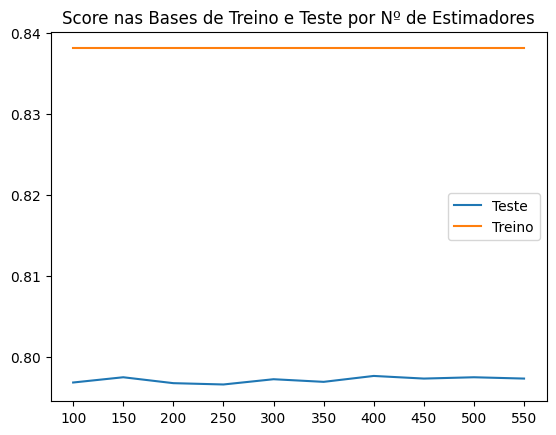

In [11]:
fig, ax = plt.subplots()

sns.lineplot(x=rfcs.keys(), y=[rfc.score(X_test, y_test) for rfc in rfcs.values()], ax=ax, label='Teste')
sns.lineplot(x=rfcs.keys(), y=[rfc.score(X_train, y_train) for rfc in rfcs.values()], ax=ax, label='Treino')

ax.legend()
plt.title('Score nas Bases de Treino e Teste por Nº de Estimadores')
plt.show()

## Resultados
Observando o gráfico acima, é possível notar que o desempenho do modelo treinado na base de treino é constante, enquanto o seu desempenho flutua mais na base de teste, ainda assim, apresenta uma acurácia satisfatória. Muito semelhante ao desempenho do algoritmo **BaggingClassifier**, isso porque o mesmo foi implementado passando o argumento padrão **ClassifierTree**, resultando em resultados se não idênticos, semelhantes.

# Diferenças entre os Algoritmos
A principal diferença entre os algoritmos **Bagging** e **Random Forest** é a especialização. Modelos Random Forest utilizam as mesmas técnias que os modelos Bagging, exceto que o estimador base é **sempre** uma árvore de decisão com a adoção de um passo a mais, o **feature randomization** que serve para torna as árvores criadas mais independentes, tornando o modelo mais robusto e menos enviesado.